### Data Description: 

`The file Bank.xls contains data on 5000 customers.`

The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.


### Domain: Banking

`Context: This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).`

`A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.`


### Learning Outcomes:

`1. Exploratory Data Analysis`

`2 .Data Cleaning`

`3. Data Visualization`

`4. Preparing the data to train a model`
    
 `5. Training and making predictions using a classification model.`
    
   `6. Model evaluation`




### Objective: 

`The classification goal is to predict the likelihood of a liability customer buying personal loans which means we have to build a model which will be used to predict which customer will most likely to accept the offer for personal loan, based on the specific relationship with the bank across various features given in the dataset.`

`Here I will be using the Supervised Learning methods to predict which model is best for this problem amongst Logistic      Regresssion, K-Nearest Neighbors(KNN) and Naive Bayes Algorigthm.`

#### Features(attributes) Understanding from the above dataframe :-

`The ID variable can be ignored as it will not any effect on our model. As we know customer Id is just to maitain the record in serial order. There is no relationship with Id and Loan.`
`Target Variable is Personal Loan which describe whether the person has taken loan or not. This is the variable which we need to predict.`

###### Nonimal Varibles :
1. ID - Customer ID
2. ZIP Code - Home Address ZIP code of the customer. This variable can also be ignored becasue we can not judge the customers based on thier area or location.

##### Ordinal Categorical variables :
3. Family - Number of famlily member of the customer
4. Education - Education level of the customer. In our dataset it ranges from 1 to 3 which are Under Graduate, Graduate and Post Graduate respectivly.

###### Interval Variables:
5. Age - Age of the customer
6. Experience - Years of experience of customer has
7. Income - Annula Income of the customer which is in dollars
8. CCAvg - Avg. spending on credit cards per month which in dollars.
9. Mortgage - Value of House Mortgage
10. Binary Categorical Variable :
11. CD Account - Does the customer have CD Account with bank or not?
12. Security Account - Does the customer have Security Account with bank or not?
13. Online - Does the customer have Online banking facility with bank or not?
14. Credit Card - Does the customer have a credit card issued by Universal Bank or not?
15. Personal Loan - This our target variable which we have to predict. This indicates that the customer has token loan or not?

In [1]:
!pip install seaborn
!pip install boto3
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 6.4 MB/s eta 0:00:0000:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 65.3 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 9.7 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 55.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 28.7 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [2]:
import os
import pandas as pd
import numpy as np  #for linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import boto3

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import VotingClassifier, BaggingClassifier, BaseEnsemble,StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


#import graphviz.backend as be
#from dtreeviz.trees import *
from IPython.display import Image, display_svg,SVG
from sklearn.tree import plot_tree

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score,consensus_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import fbeta_score, make_scorer

from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


import warnings
warnings.filterwarnings('ignore')

from sklearn import set_config
set_config(display='diagram')

In [3]:
s3 = boto3.client('s3')

s3= boto3.resource(
    service_name ='s3',
    region_name = 'ap-northeast-1',
    aws_access_key_id = '**********************',
    aws_secret_access_key='*******************************')

import os
os.environ['AWS_DEFAULT_REGION']='ap-northeast-1'
os.environ['AWS_ACCESS_KEY_ID']='**********************'
os.environ['AWS_SECRET_ACCESS_KEY'] ='*******************************'

obj = s3.Bucket('mohitvv').Object('Customer Personal Loan.csv').get()
df= pd.read_csv(obj['Body'], index_col=0)

In [4]:
df.head()

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
ID                                                                          
1    25           1      49     91107       4    1.6          1         0   
2    45          19      34     90089       3    1.5          1         0   
3    39          15      11     94720       1    1.0          1         0   
4    35           9     100     94112       1    2.7          2         0   
5    35           8      45     91330       4    1.0          2         0   

    Personal Loan  Securities Account  CD Account  Online  CreditCard  
ID                                                                     
1               0                   1           0       0           0  
2               0                   1           0       0           0  
3               0                   0           0       0           0  
4               0                   0           0       0           0  
5               0                   0           0       0           1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


In [6]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

Age   Experience       Income      ZIP Code       Family  \
count  5000.000000  5000.000000  5000.000000   5000.000000  5000.000000   
mean     45.338400    20.104600    73.774200  93152.503000     2.396400   
std      11.463166    11.467954    46.033729   2121.852197     1.147663   
min      23.000000    -3.000000     8.000000   9307.000000     1.000000   
25%      35.000000    10.000000    39.000000  91911.000000     1.000000   
50%      45.000000    20.000000    64.000000  93437.000000     2.000000   
75%      55.000000    30.000000    98.000000  94608.000000     3.000000   
max      67.000000    43.000000   224.000000  96651.000000     4.000000   

             CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000    5000.000000   
mean      1.937938     1.881000    56.498800       0.096000   
std       1.747659     0.839869   101.713802       0.294621   
min       0.000000     1.000000     0.000000       0.000000   
25%       0.700000     1.000000     0.000000       0.000000   
50%       1.500000     2.000000     0.000000       0.000000   
75%       2.500000     3.000000   101.000000       0.000000   
max      10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [9]:
df.shape

(5000, 13)

In [10]:
df.sample(3)
df.reset_index(inplace=True)

In [11]:
#Removing the ID columns becuase it is un-relevant 

df.drop(columns=['ID'],axis=1,inplace=True)
df.head(3)

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1      49     91107       4    1.6          1         0   
1   45          19      34     90089       3    1.5          1         0   
2   39          15      11     94720       1    1.0          1         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0

In [12]:
# Appending the target column.

df['Personal Loans'] = df['Personal Loan']
df.drop(['Personal Loan'],axis=1,inplace=True)

In [13]:
(df.corr()*100).style.background_gradient('coolwarm')

`1. Age and experience is higly correalted with each other`

`2. Income is modelarily correalted with CCAvg`

`3. INCOME INFLUENCES CCAVG, MORTGAGE AND CD ACCOUNT`

`4. BY THIS WE CAN UNDERSTAND THAT THERE IS ASSOCIATION BETWEEN THE SECURITIES ACCOUNT, ONLINE, CREDIT CARD, EDUCATION,
    CCAVG, CDACCOUNT AND INCOME ALSO WITH PERSONALS LOANS`

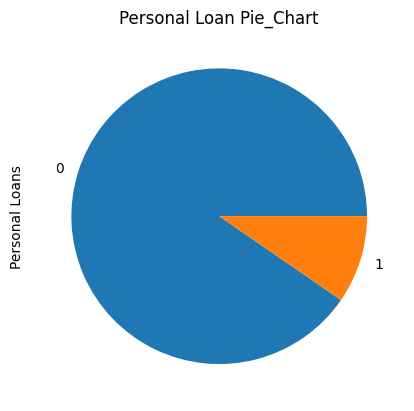

In [14]:
#1.firstly will check how many customer have taken personal load already.

#Our main target is build a model which can tell us which is most likely to get the personal loan. 

df['Personal Loans'].value_counts().plot(kind='pie')
plt.title('Personal Loan Pie_Chart')
plt.show()

In [15]:
df[df['Personal Loans']==1].describe()

Age  Experience      Income      ZIP Code      Family  \
count  480.000000  480.000000  480.000000    480.000000  480.000000   
mean    45.066667   19.843750  144.745833  93153.202083    2.612500   
std     11.590964   11.582443   31.584429   1759.223753    1.115393   
min     26.000000    0.000000   60.000000  90016.000000    1.000000   
25%     35.000000    9.000000  122.000000  91908.750000    2.000000   
50%     45.000000   20.000000  142.500000  93407.000000    3.000000   
75%     55.000000   30.000000  172.000000  94705.500000    4.000000   
max     65.000000   41.000000  203.000000  96008.000000    4.000000   

            CCAvg   Education    Mortgage  Securities Account  CD Account  \
count  480.000000  480.000000  480.000000          480.000000  480.000000   
mean     3.905354    2.233333  100.845833            0.125000    0.291667   
std      2.097681    0.753373  160.847862            0.331064    0.455004   
min      0.000000    1.000000    0.000000            0.000000    0.000000   
25%      2.600000    2.000000    0.000000            0.000000    0.000000   
50%      3.800000    2.000000    0.000000            0.000000    0.000000   
75%      5.347500    3.000000  192.500000            0.000000    1.000000   
max     10.000000    3.000000  617.000000            1.000000    1.000000   

          Online  CreditCard  Personal Loans  
count  480.00000  480.000000           480.0  
mean     0.60625    0.297917             1.0  
std      0.48909    0.457820             0.0  
min      0.00000    0.000000             1.0  
25%      0.00000    0.000000             1.0  
50%      1.00000    0.000000             1.0  
75%      1.00000    1.000000             1.0  
max      1.00000    1.000000             1.0

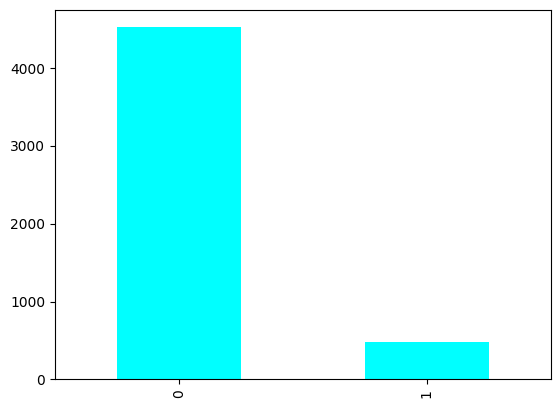

In [16]:
df["Personal Loans"].value_counts().plot(kind='bar',color='cyan')
plt.show()

#- DATA IS HIGHLY IMBALANCED, MEANS ONLY FEW PEOPLE TAKEN THE LOANS.

## EDA

In [17]:
df2 = df.copy()

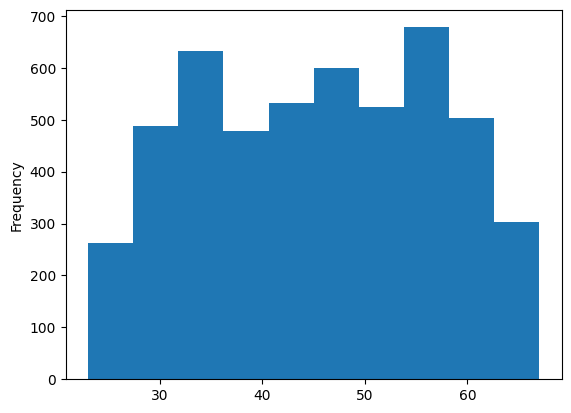

In [18]:
df2['Age'].plot(kind='hist',bins=10)
plt.show()

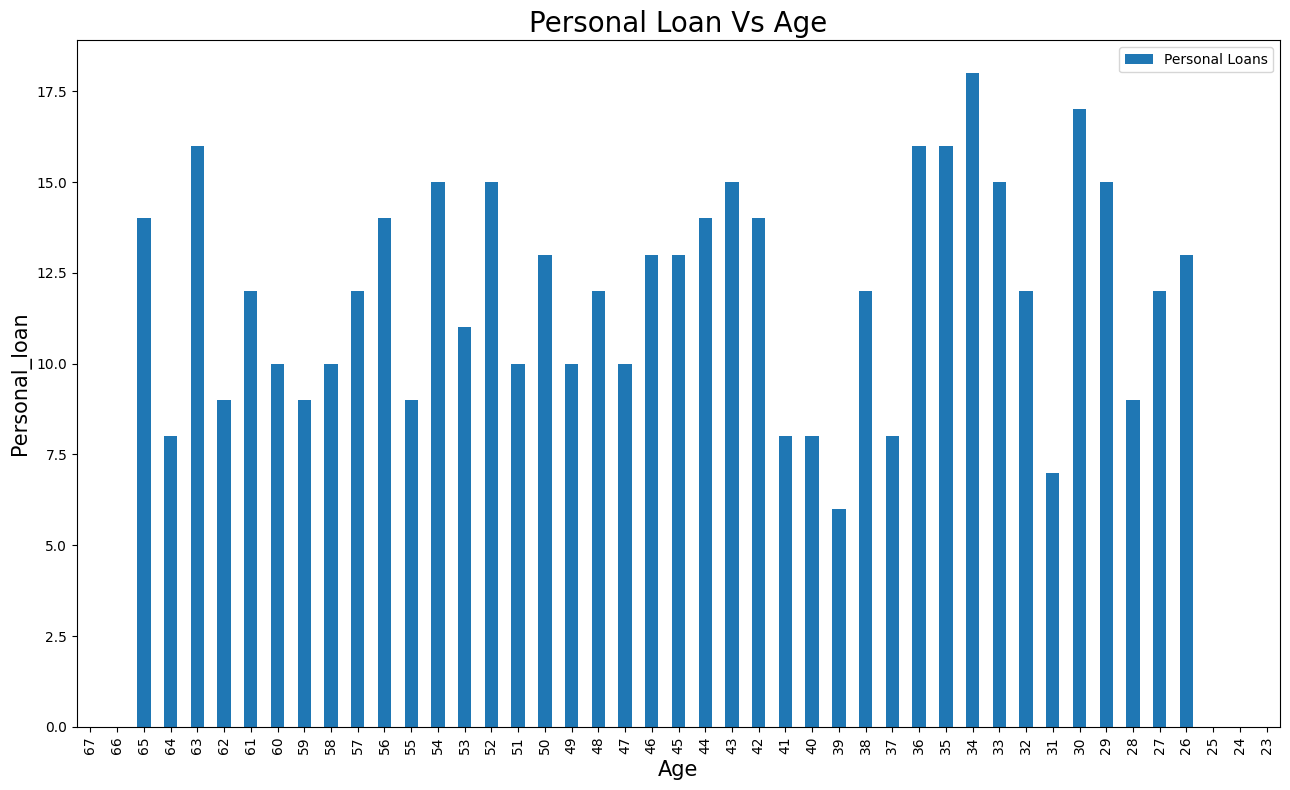

In [19]:
df2[['Age',"Personal Loans"]].groupby('Age').agg({'Personal Loans':np.sum}).sort_values(by='Age',ascending=False).plot(kind='bar',figsize=(13,8))
plt.xlabel('Age',fontsize=15)
plt.ylabel('Personal_loan',fontsize=15)
plt.title('Personal Loan Vs Age',fontsize=20)
plt.tight_layout()

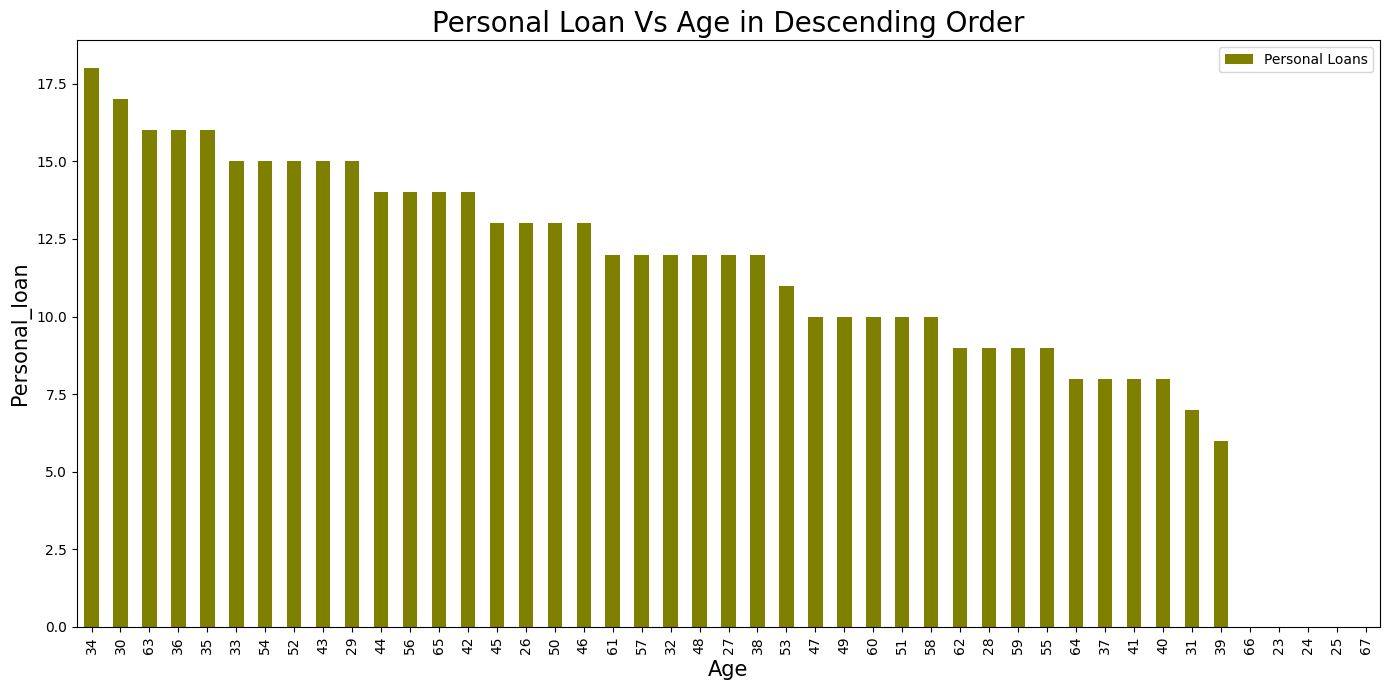

In [20]:
df2[['Age',"Personal Loans"]].groupby('Age').agg({'Personal Loans':np.sum}).sort_values(by='Personal Loans',ascending=False).plot(kind='bar',figsize=(14,7),color='olive')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Personal_loan',fontsize=15)
plt.title('Personal Loan Vs Age in Descending Order',fontsize=20)
plt.tight_layout()

`Age Columns Insight`

`1. The people who had taken the loan which comes under the Age category which taken loan is in between 26 to 65, These are the people have high chance of Taking personal loan`

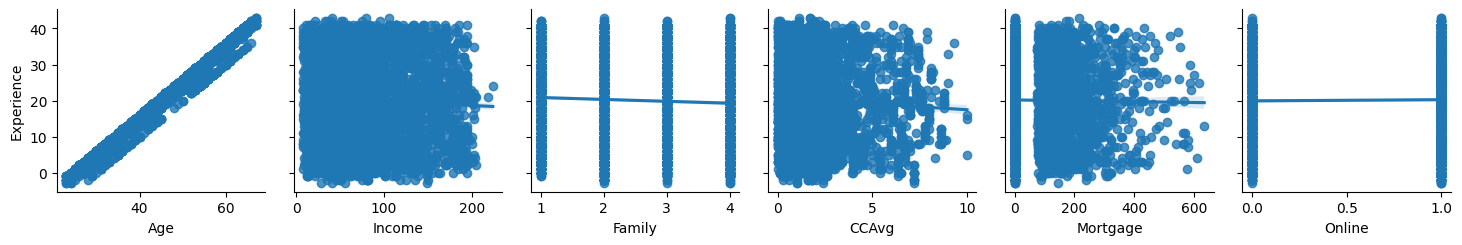

In [21]:
# AGE VS EXPERIENCE 

grid = sns.PairGrid(data=df2,
            y_vars = 'Experience',
            x_vars = ['Age','Income','Family','CCAvg','Mortgage','Online'])
grid.map(sns.regplot)
plt.show()

`from the above graph it shows that we have strong relation between age and experience`

In [22]:
set(df2['Experience'])

#Here we have negative experiences, which is not possible so we can remove them with 0.

print('Negative Experiences\n',df2[df2['Experience']<0]['Experience'].value_counts())

df2['Experience'] = np.where(df2['Experience']<0,0, df2['Experience'])

print('\nLet check any Negative experiences values present in after replacing:',df2[df2['Experience']<0].shape)

Negative Experiences
 -1    33
-2    15
-3     4
Name: Experience, dtype: int64

Let check any Negative experiences values present in after replacing: (0, 13)


In [23]:
df2['Experience'].describe()

count    5000.000000
mean       20.119600
std        11.440484
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

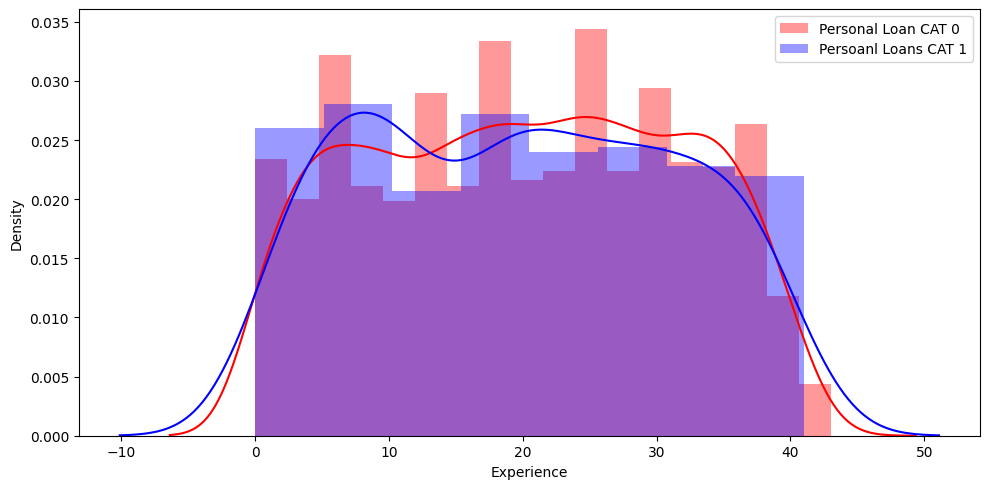

In [24]:
plt.figure(figsize=(10,5))
sns.distplot( df2[df2['Personal Loans']==0]['Experience'], color='r',kde=True, label='Personal Loan CAT 0')
sns.distplot(df2[df2['Personal Loans']==1]["Experience"],color='b', kde=True, label='Persoanl Loans CAT 1')
plt.legend()
plt.tight_layout()
plt.show()

#### EXPERIENCE INSPECTION COMMENTS

`-> As we know that, Experience with age in highly correlated both of them is have same distribution, Means that Experience 
have taken loanbeen able have equal distribution like that people who has not taken loan`

In [25]:
df2.head(4)

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1      49     91107       4    1.6          1         0   
1   45          19      34     90089       3    1.5          1         0   
2   39          15      11     94720       1    1.0          1         0   
3   35           9     100     94112       1    2.7          2         0   

   Securities Account  CD Account  Online  CreditCard  Personal Loans  
0                   1           0       0           0               0  
1                   1           0       0           0               0  
2                   0           0       0           0               0  
3                   0           0       0           0               0

### INCOME

In [26]:
print('Income of people who has Not-taken Personals Loans :',df2[df2['Personal Loans']==0]['Income'].mean())
print('Income of people has taken the Personal Loans :',df2[df2['Personal Loans']==1]['Income'].mean())

Income of people who has Not-taken Personals Loans : 66.23738938053097
Income of people has taken the Personal Loans : 144.74583333333334


<AxesSubplot: xlabel='Age', ylabel='Income'>

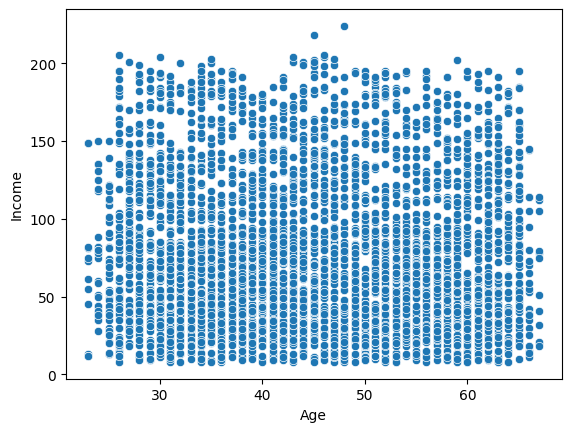

In [27]:
sns.scatterplot(x=df2['Age'],y=df2['Income'])

Skewness : 84.13386072610815


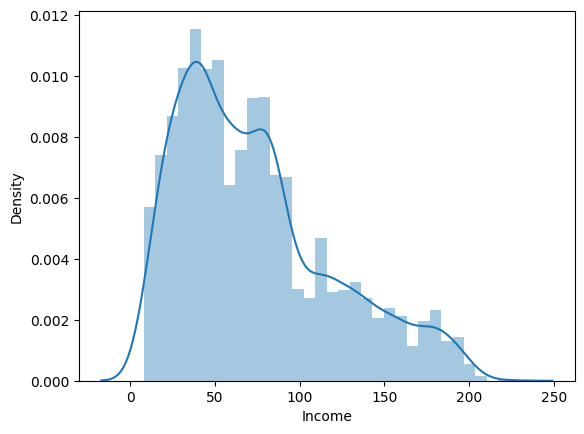

In [28]:
sns.distplot(df2['Income'],kde=True)
print("Skewness :",df2['Income'].skew()*100)

### FAMILY 

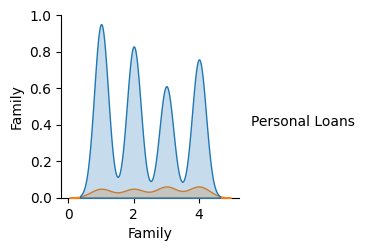

In [29]:
pd.unique(df2['Family'])

sns.pairplot(df2, vars=['Family'],hue='Personal Loans')
plt.show()

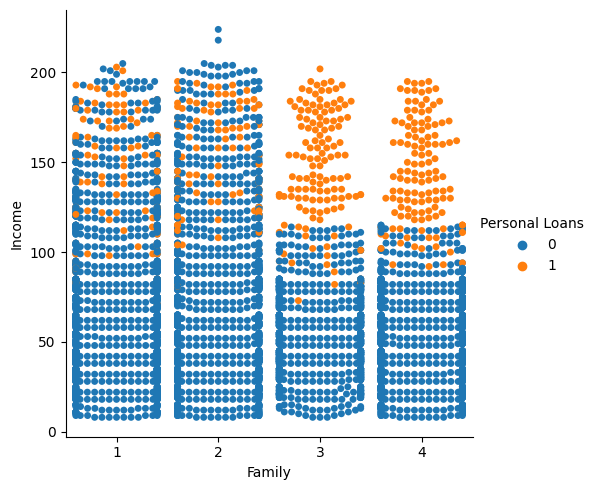

In [30]:
sns.catplot(x='Family' ,y='Income',hue='Personal Loans',data=df2 ,kind='swarm')

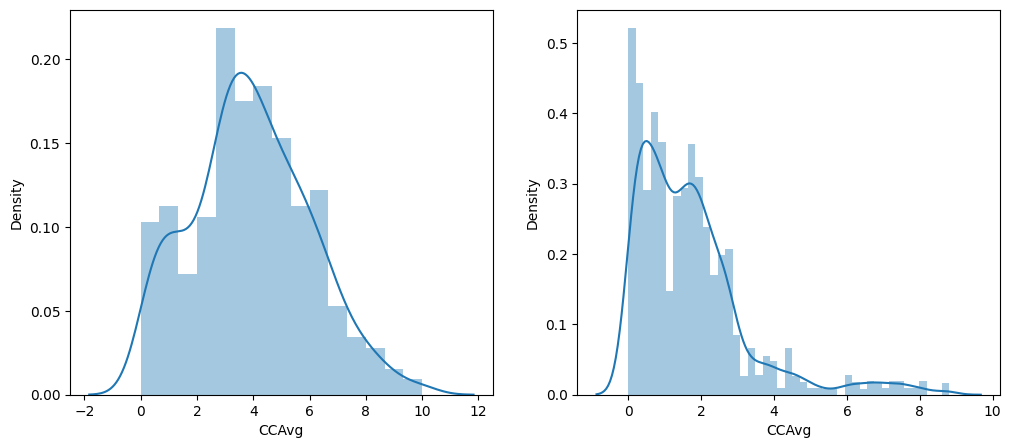

In [31]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot( df2[df2['Personal Loans']==1]['CCAvg'],kde=True)

plt.subplot(1,2,2)
sns.distplot( df2[df2['Personal Loans']==0]['CCAvg'], kde =True)

plt.show()

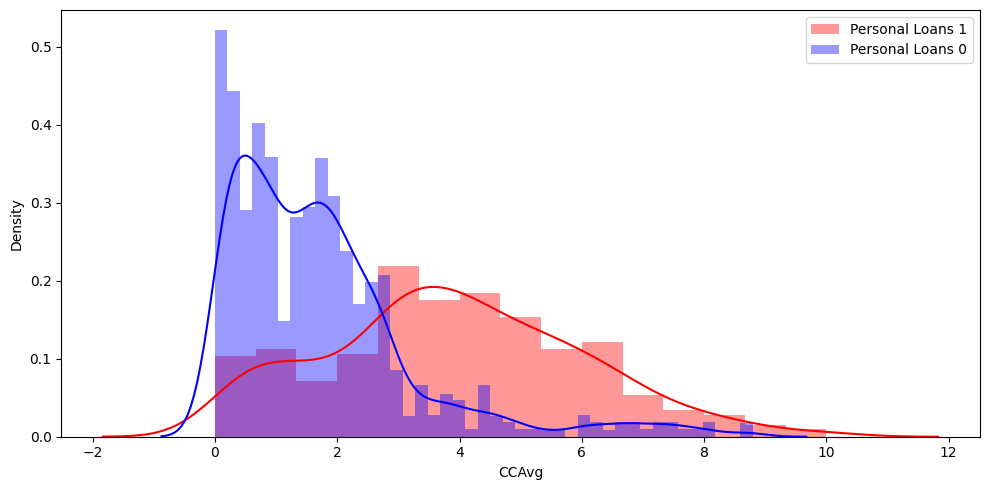

In [32]:
plt.figure(figsize=(10,5))

sns.distplot(df2[df2['Personal Loans']==1]['CCAvg'],color='r',kde=True, label='Personal Loans 1')
sns.distplot(df2[df2['Personal Loans']==0]['CCAvg'],color='b',kde=True, label='Personal Loans 0')
plt.tight_layout()
plt.legend()
plt.show()

`Examination View`

`1  People which not taken the loan have CCAvg vaulues below 3.`

`2. People have taken loan have CC values in the range of 3 to 10, where 10 is Max`

## EDUCATION

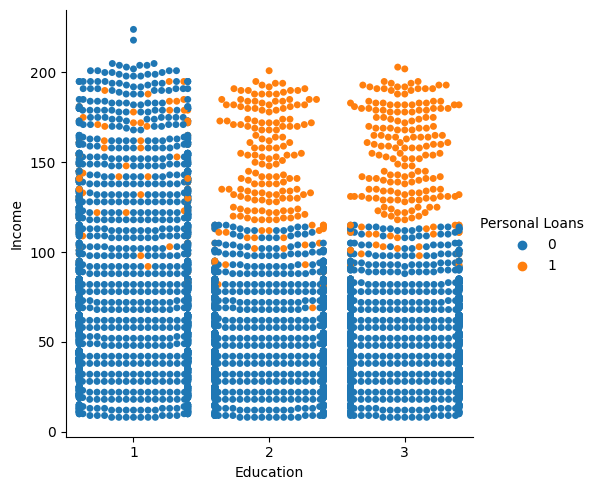

In [33]:
sns.catplot(x='Education', y='Income',data=df2,kind='swarm',hue='Personal Loans')

`Inspection`

`1. People are in group one which means, Under Grad people has less chance/Interest to accept the Loan`

`2. Whereas, People in Education category 2 and 3 is high chance/requirements of getting accpet the loan call`

<AxesSubplot: xlabel='Education', ylabel='Income'>

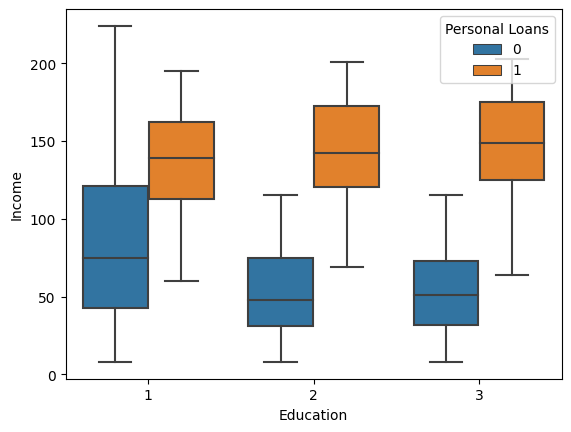

In [34]:
sns.boxplot(data=df2,x='Education', y='Income',hue='Personal Loans')

#### Inspection

` It means that Education people have Income higher than 120k, have high chances to take the loans in all category,
whether low income people don't want to take it`

## MORTAGE

In [35]:
df2['Mortgage'].value_counts()


0      3462
98       17
119      16
89       16
91       16
       ... 
547       1
458       1
505       1
361       1
541       1
Name: Mortgage, Length: 347, dtype: int64

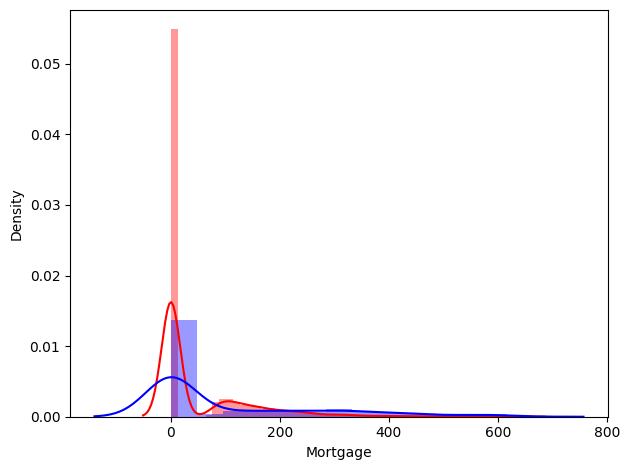

In [36]:
sns.distplot(df2[df2['Personal Loans']==0]['Mortgage'],color='r',kde=True,label='Personal Loans 0')
sns.distplot(df2[df2['Personal Loans']==1]['Mortgage'],color='b',kde=True, label='Personal Loan 1')
plt.tight_layout()
plt.show()

In [37]:
df2['Mortgage'].skew()

2.1040023191079444

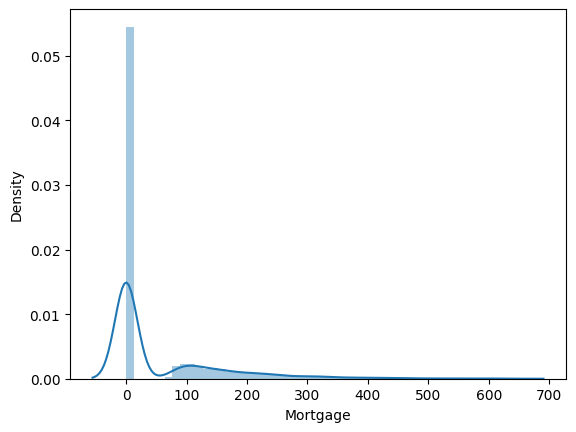

In [38]:
sns.distplot(df2['Mortgage'])
plt.show()

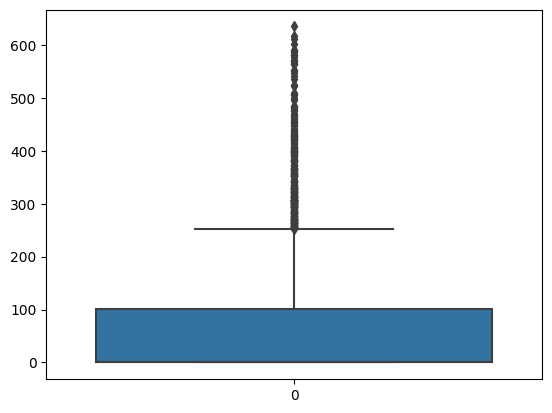

In [39]:
sns.boxplot(df2['Mortgage'])
plt.show()

#### Mortgage Inspection

`1. Here we clealy view, where the people has no taken the loan, like maximum people have mortgage value is 0,the spike 
    refering us the same.`
    
`2. And where the people has taken the loan has mortgage value in range of 0 to 200, whereas in this people which have taken 
the loan also have mortgage value 0, but instead of this they might selected for Loan criteria, which maybe due to other
factors like CCAvg has higher or Education.`

In [40]:
#MOST OF THE PEOPLE HAVE HOUSE VALUES IS ABOUT 0, BUT ONLY FEW PEOPLE HAVING HOUSE VALUE BETWEEN 100K TO 600K

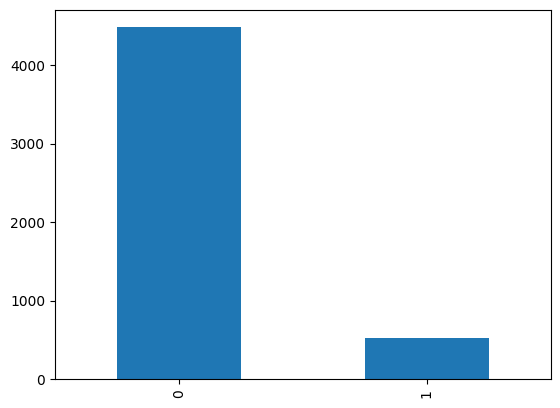

In [41]:
df2['Securities Account'].value_counts().plot(kind='bar')
plt.show()

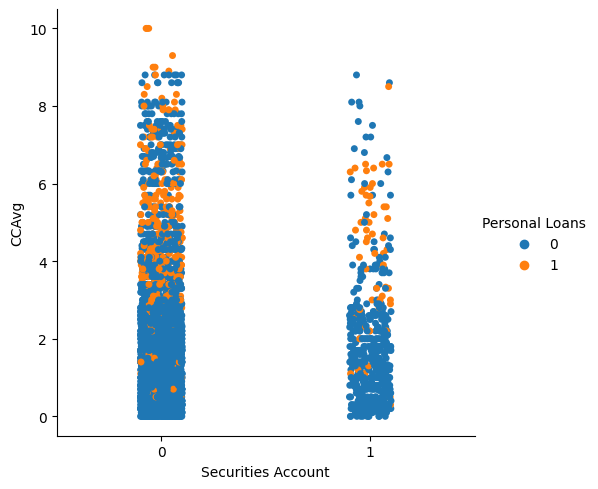

In [42]:
sns.catplot(x='Securities Account', y='CCAvg',data=df2,cmap='swarm',hue='Personal Loans')
plt.show()

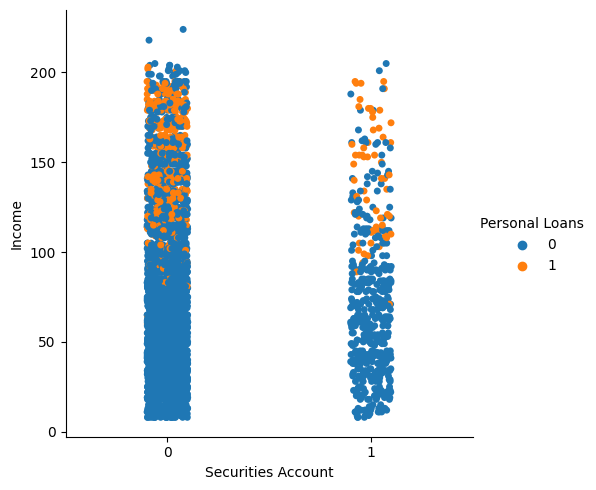

In [43]:
sns.catplot(x='Securities Account', y='Income',data=df2,cmap='swarm',hue='Personal Loans')
plt.show()

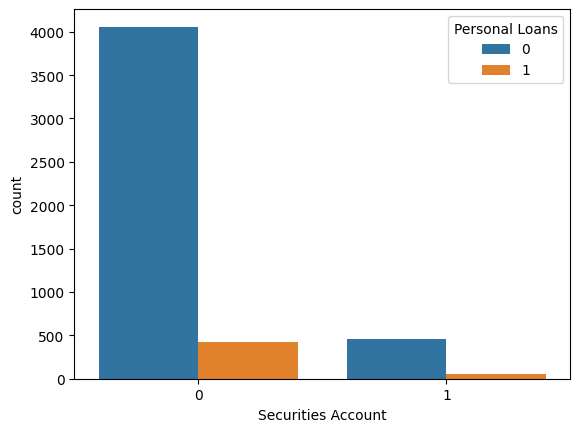

In [44]:
sns.countplot(x='Securities Account',data= df2,hue='Personal Loans')
plt.show()

#### Inspection of Securities Account

`1.It means that people have No security account have high chance to take the loans whereas the people have security account
have less chance to take the loans`



### ONLINE 

<AxesSubplot: >

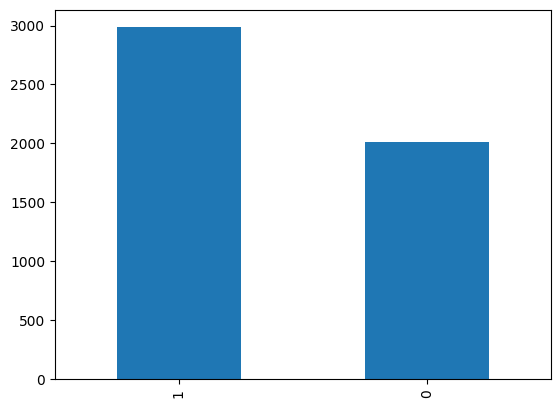

In [45]:
df2['Online'].value_counts().plot(kind='bar')

## CREDIT CARD

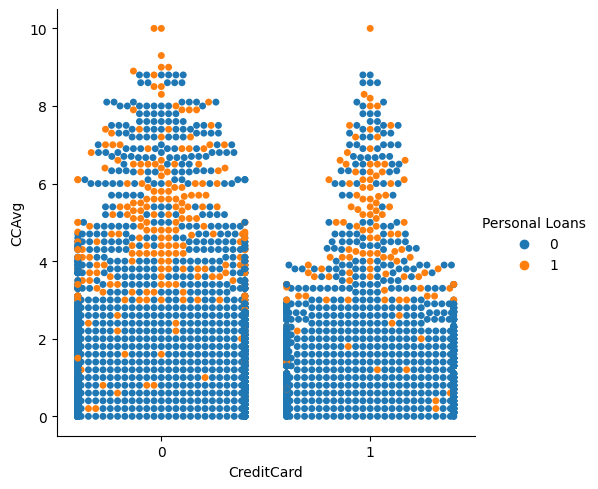

In [46]:
sns.catplot(x='CreditCard',y='CCAvg',data=df2,kind='swarm', hue='Personal Loans')

<AxesSubplot: >

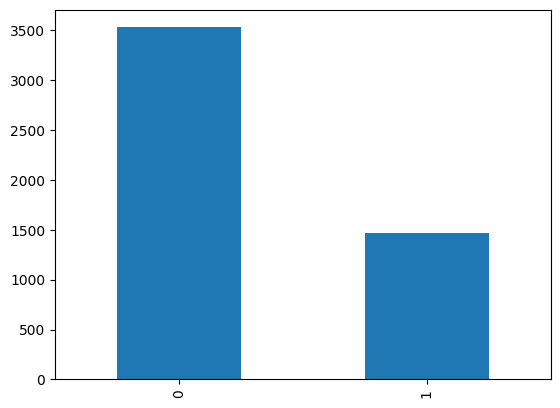

In [47]:
df2['CreditCard'].value_counts().plot(kind='bar')

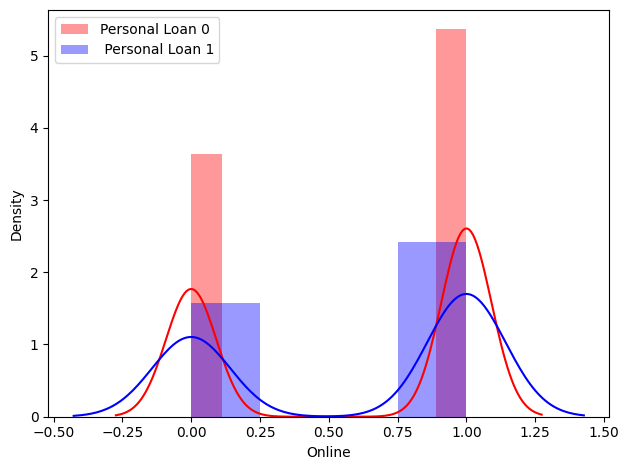

In [48]:
sns.distplot(df2[df2['Personal Loans']==0]['Online'], color ='r', kde='True', label='Personal Loan 0')
sns.distplot(df2[df2['Personal Loans']==1]['Online'], color='b', kde='True', label=' Personal Loan 1')
plt.tight_layout()
plt.legend()
plt.show()

In [49]:
(df2.corr()*100).style.background_gradient('coolwarm')

#### CREDIT CARD INSPECTION OVERVIEW

`1. People have high credit score will get the loan easily which is obovious.`

`2. But the point is people with No-credit card will also get the loans which shows Credit card is not that much important factor to analyze that person will get the loan or not & Because If we saw people have high in range which don't have credit card and taken the loan by using so and so factors`

In [50]:
df2[['Experience','Personal Loans','Income']].groupby(['Experience','Personal Loans']).agg({'Income':np.mean}).sort_values(by='Income',ascending=False).head(50)

Income
Experience Personal Loans            
15         1               175.400000
28         1               164.818182
11         1               163.461538
36         1               161.666667
33         1               159.000000
24         1               155.625000
23         1               155.307692
14         1               154.166667
10         1               154.000000
41         1               153.714286
6          1               151.083333
2          1               150.777778
25         1               150.571429
16         1               150.384615
9          1               149.800000
26         1               148.500000
31         1               146.750000
32         1               146.571429
8          1               146.055556
37         1               145.692308
38         1               145.625000
0          1               145.142857
1          1               145.000000
18         1               144.250000
20         1               142.058824
39         1               141.700000
12         1               141.312500
35         1               140.846154
4          1               140.111111
30         1               139.615385
5          1               138.500000
3          1               136.470588
19         1               136.428571
13         1               135.090909
22         1               134.615385
27         1               134.600000
21         1               134.181818
7          1               132.000000
34         1               130.100000
29         1               129.666667
40         1               127.000000
17         1               125.000000
20         0                82.320611
22         0                77.837838
43         0                75.000000
21         0                74.480392
3          0                74.250000
17         0                72.149123
41         0                72.138889
15         0                72.008772

In [51]:
## Creating new columns which segreate the new Cx, by their 

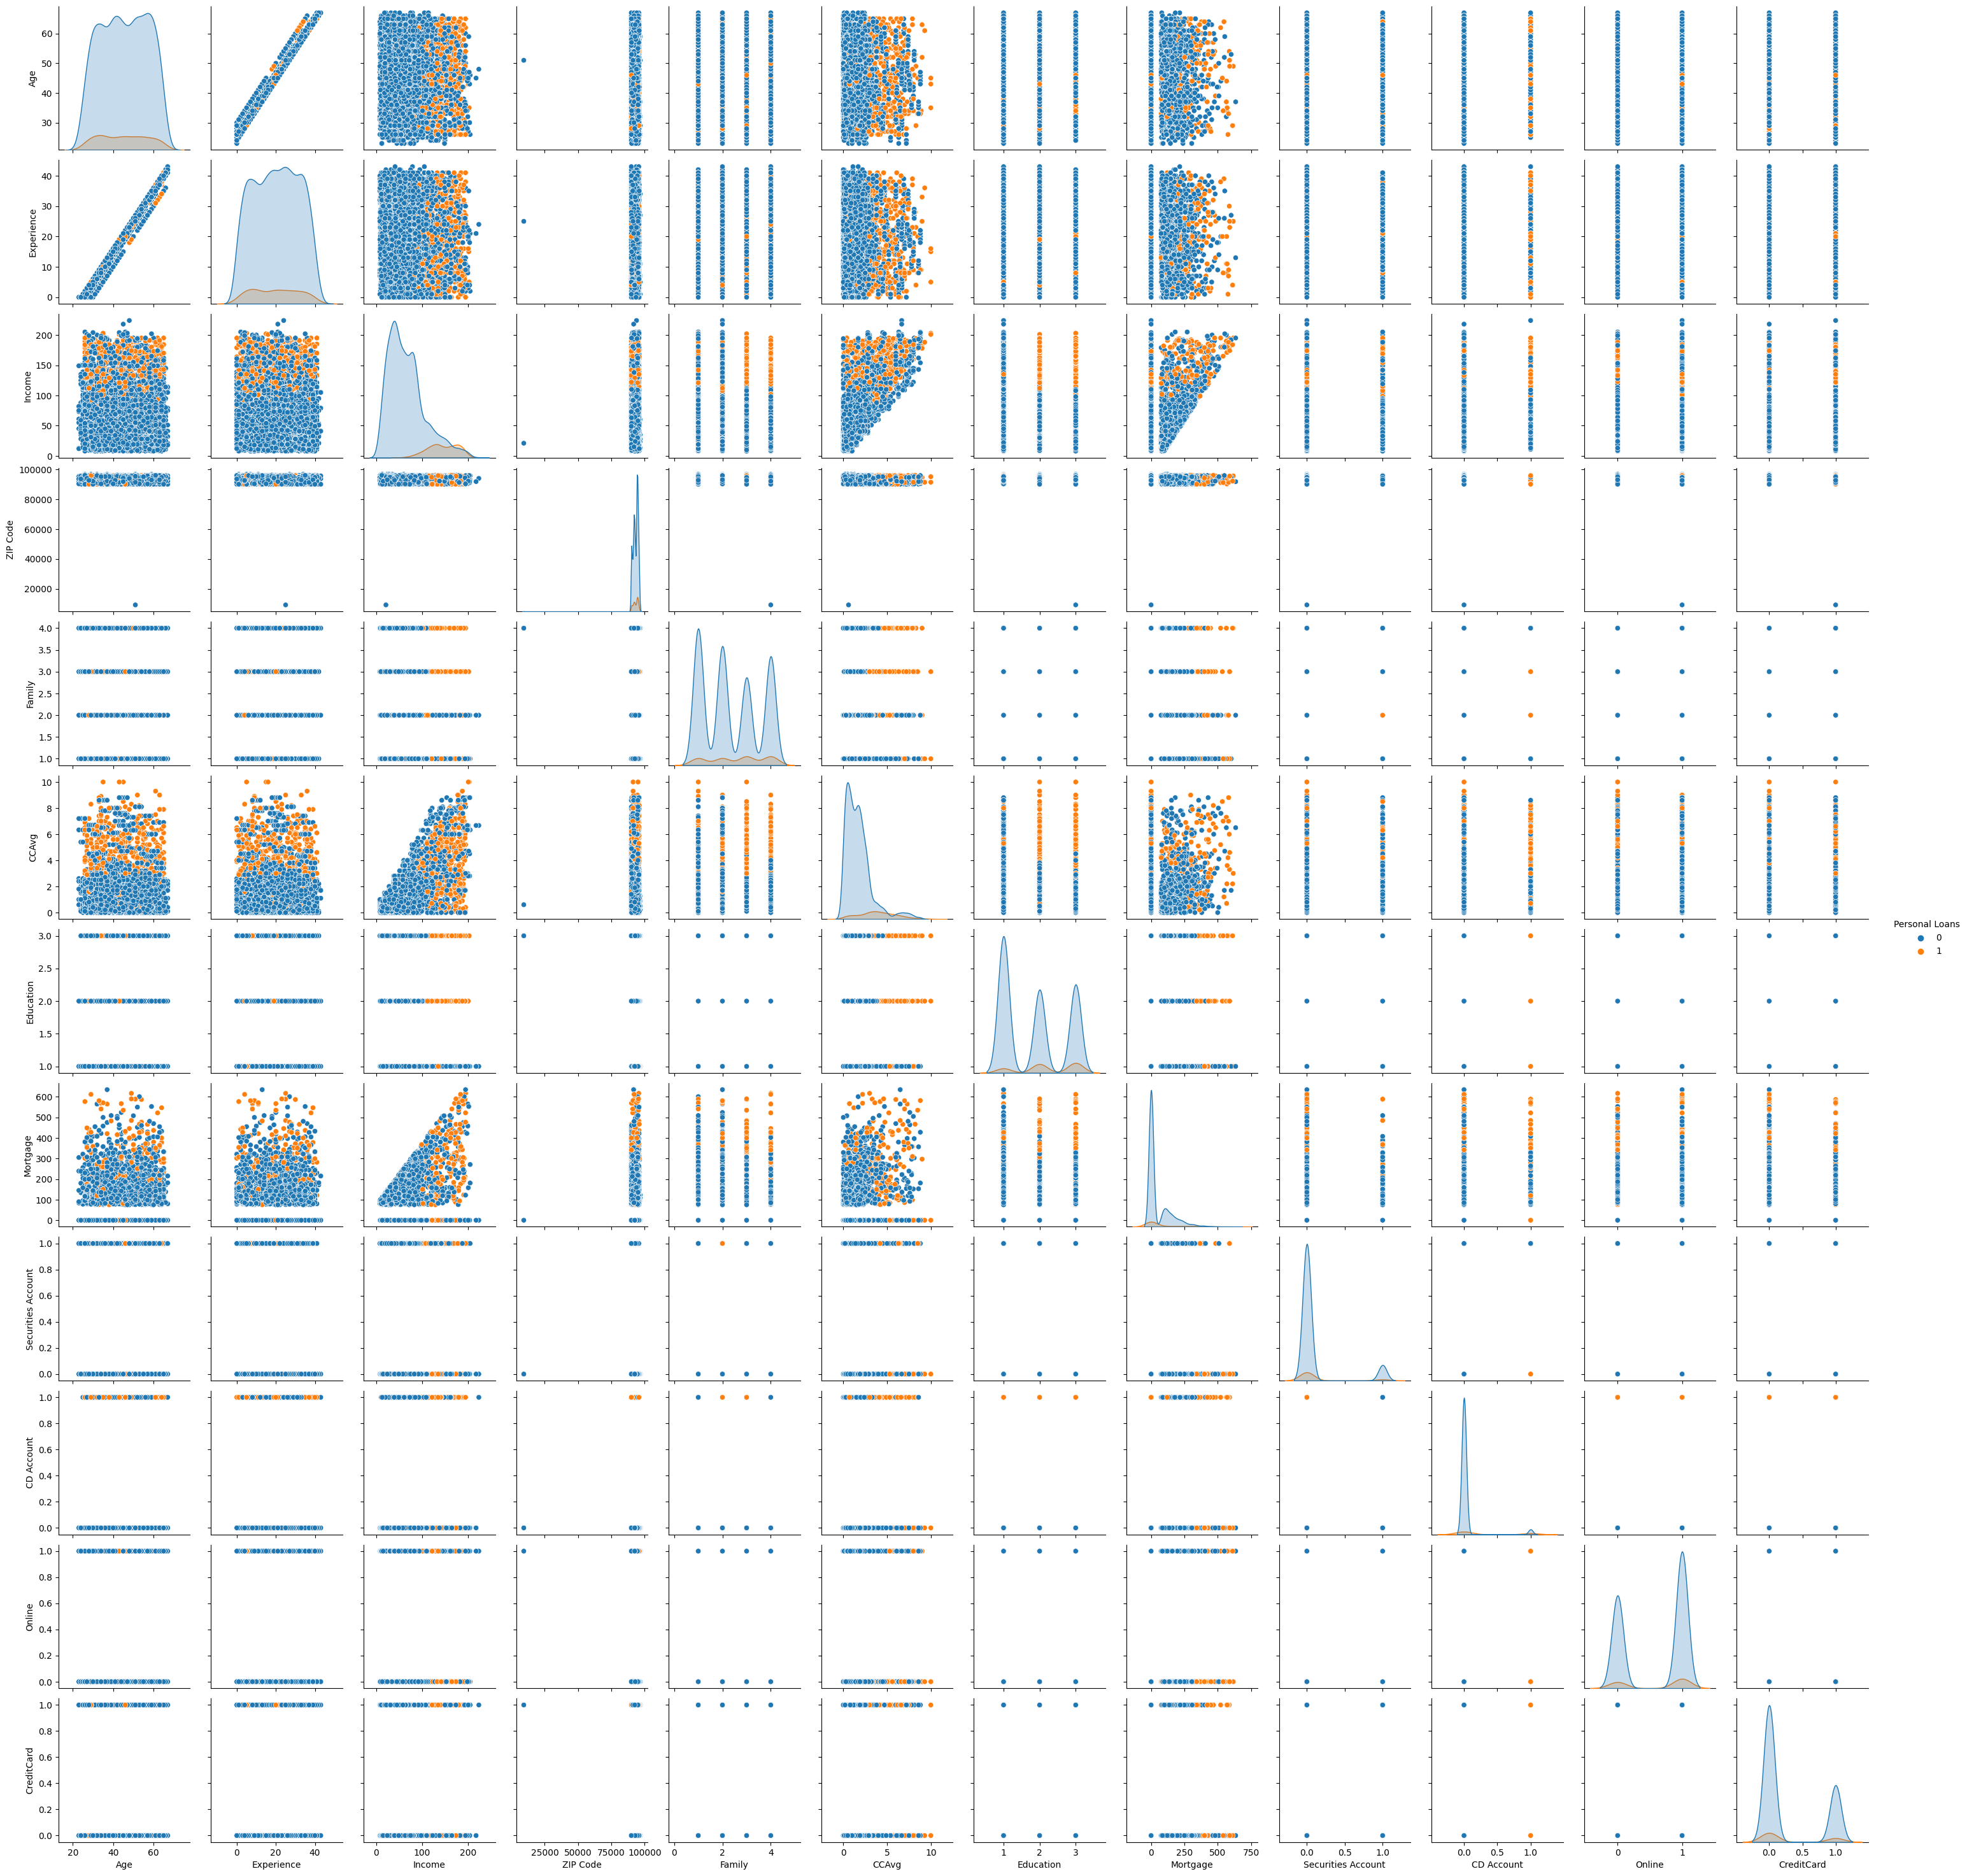

In [52]:
sns.pairplot(data=df2, hue='Personal Loans')
plt.show()

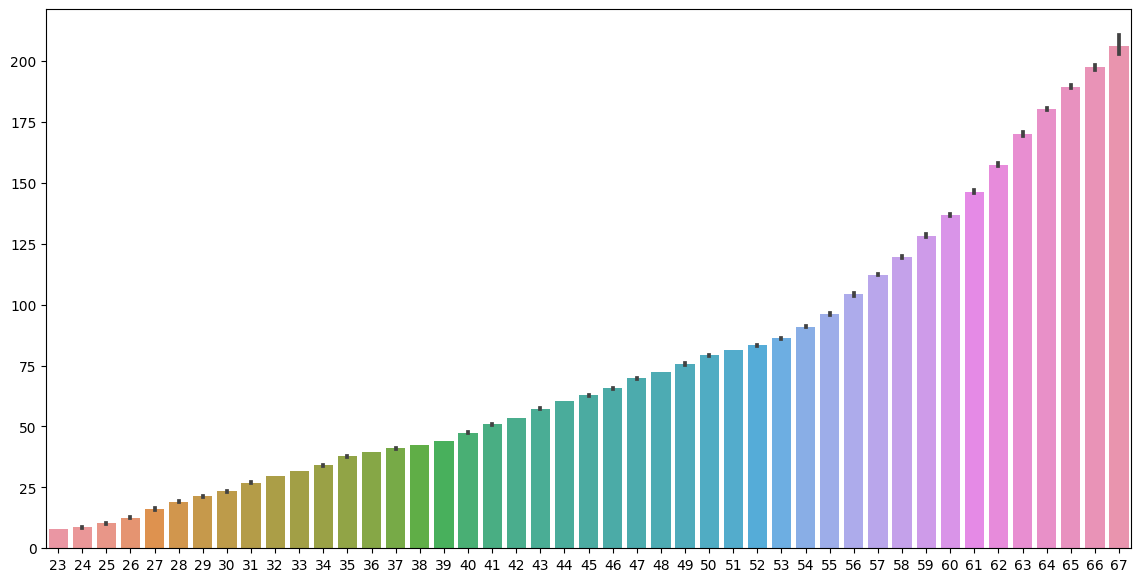

In [53]:
plt.figure(figsize=(14,7))
#plt.plot(df2['Age'],df2['Experience'],label='Points')


alpha = ['r', 'g']

sns.barplot(x = sorted(df2['Age']),y= sorted(df2['Income']) ,label='Alpha: {}'.format(alpha))
plt.show()

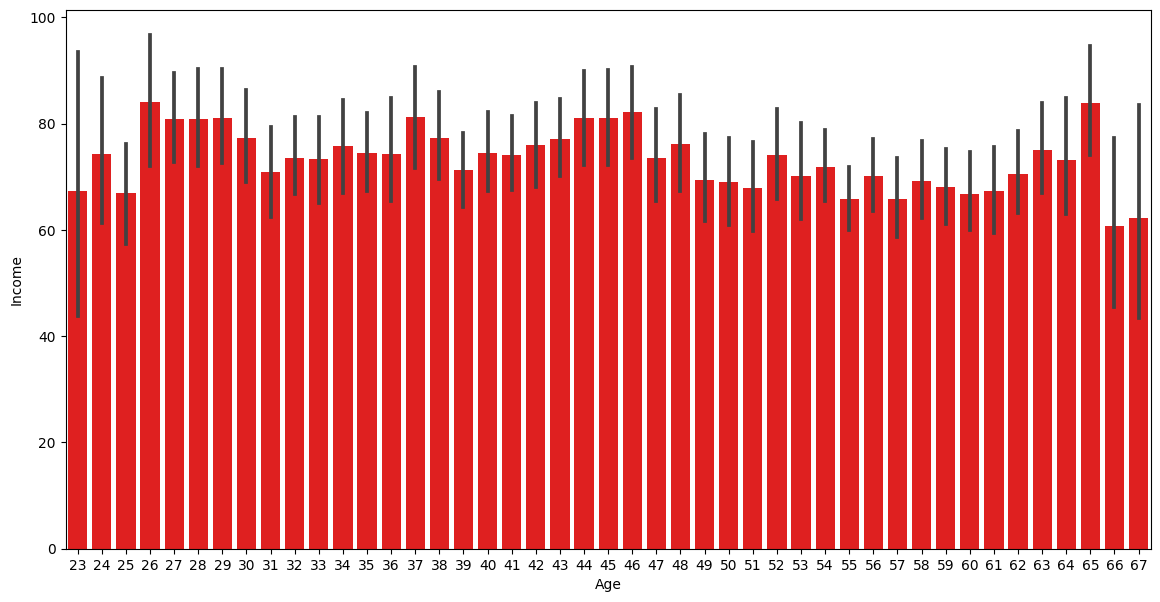

In [54]:
plt.figure(figsize=(14,7))
sns.barplot(x=df2['Age'],y=df2['Income'], color='r')
plt.show()

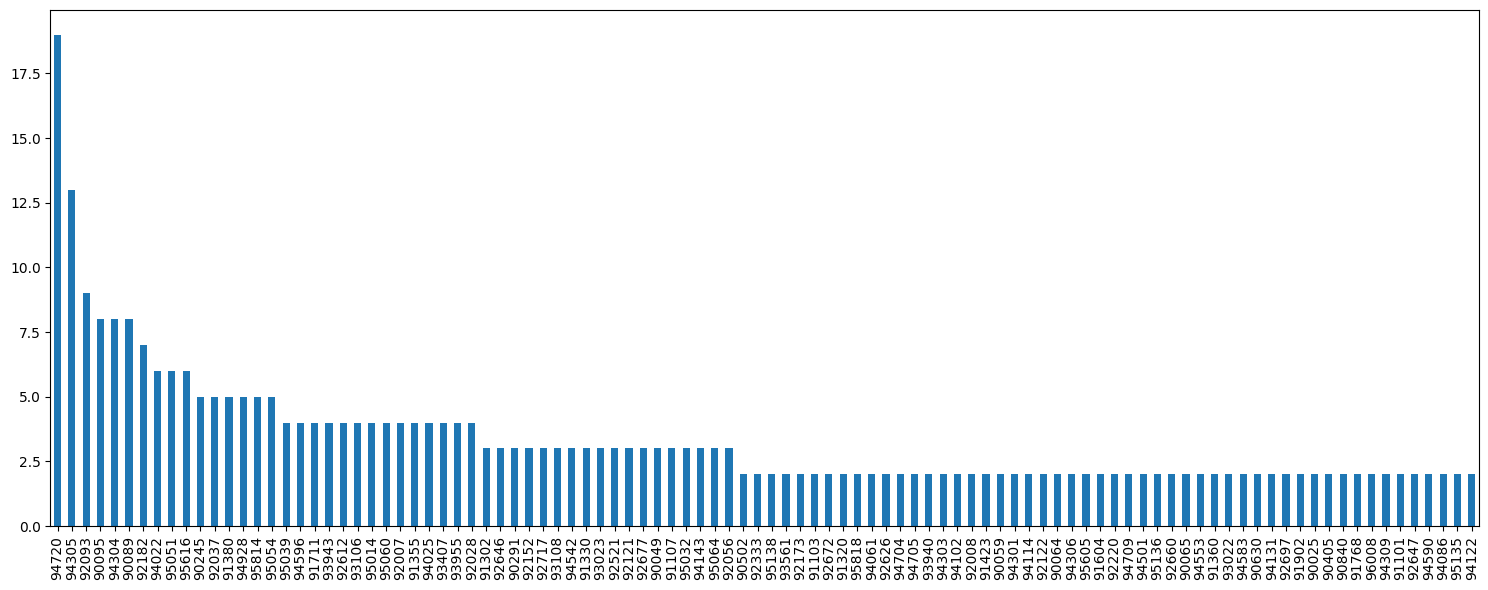

In [55]:
df2[df2['Personal Loans']==1]['ZIP Code'].value_counts().sort_values(ascending=False).head(100).plot(kind='bar',figsize=(15,6))
plt.tight_layout()

#fetching all the people which have annual income greater than

<AxesSubplot: >

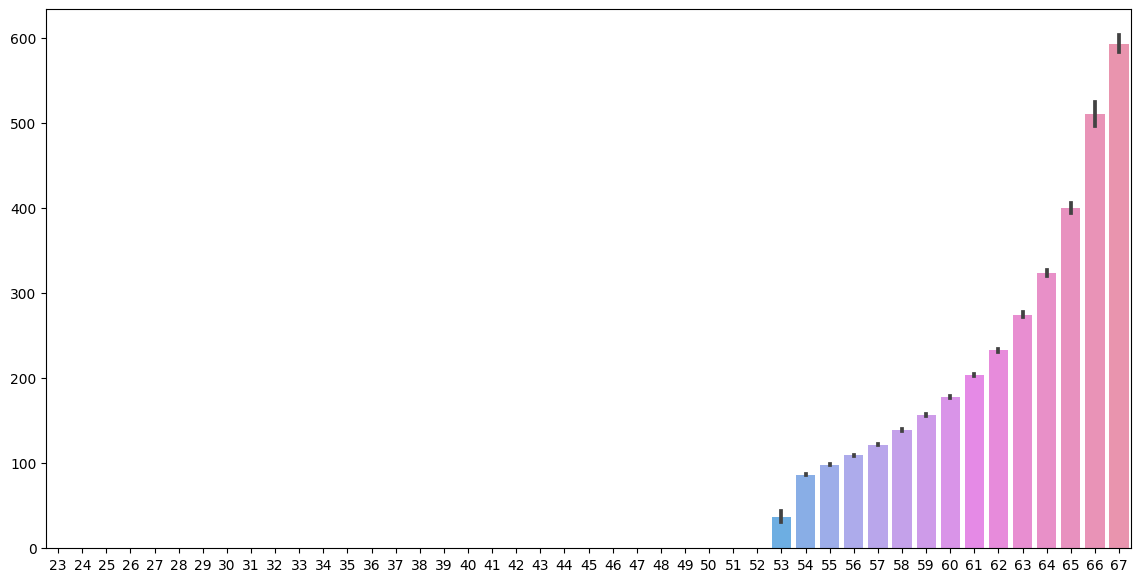

In [56]:
plt.figure(figsize=(14,7))
sns.barplot(x=sorted(df2['Age']),y=sorted(df2['Mortgage']))

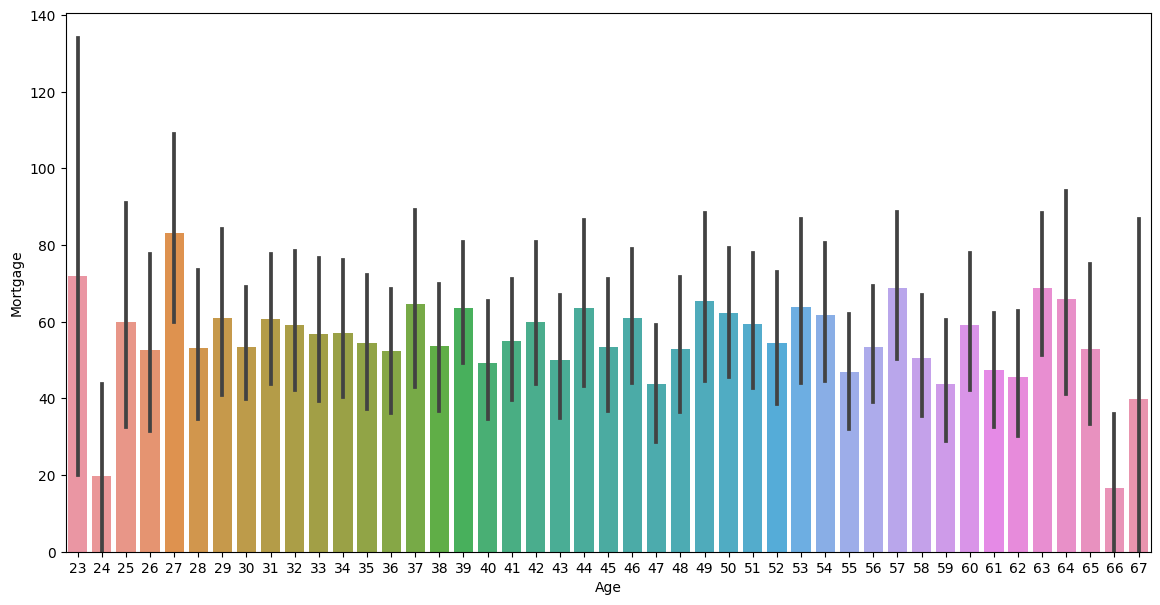

In [57]:
plt.figure(figsize=(14,7))
sns.barplot(x=df2['Age'], y=df2['Mortgage'])
plt.show()

In [58]:
((df2['ZIP Code'].value_counts()*100)/467).head(20)

94720    36.188437
94305    27.194861
95616    24.839400
90095    15.203426
93106    12.205567
93943    11.563169
92037    11.563169
91320    11.349036
91711    11.134904
94025    11.134904
92093    10.920771
90024    10.706638
90245    10.706638
90089     9.850107
91330     9.850107
92121     9.635974
94304     9.635974
94143     7.922912
95051     7.280514
94608     7.280514
Name: ZIP Code, dtype: float64

In [59]:
df2.skew().sort_values(ascending=False)

CD Account             3.691714
Personal Loans         2.743607
Securities Account     2.588268
Mortgage               2.104002
CCAvg                  1.598443
CreditCard             0.904589
Income                 0.841339
Education              0.227093
Family                 0.155221
Experience            -0.017221
Age                   -0.029341
Online                -0.394785
ZIP Code             -12.500221
dtype: float64

In [60]:
# Dropping columns one is ZIP Code which is irr-relevant and other one is Age because it is higly correlated with Experience 
# and vice versa.

df4 = df2.drop(['Age','ZIP Code'],axis=1)
df4['Personal Loan'] = df4['Personal Loans']
df5 = df4.drop(['Personal Loans'],axis=1)
df5.head(2)

Experience  Income  Family  CCAvg  Education  Mortgage  Securities Account  \
0           1      49       4    1.6          1         0                   1   
1          19      34       3    1.5          1         0                   1   

   CD Account  Online  CreditCard  Personal Loan  
0           0       0           0              0  
1           0       0           0              0

In [61]:
(df5.corr()*100).style.background_gradient('coolwarm')

In [62]:
df5.skew().sort_values(ascending=False)

CD Account            3.691714
Personal Loan         2.743607
Securities Account    2.588268
Mortgage              2.104002
CCAvg                 1.598443
CreditCard            0.904589
Income                0.841339
Education             0.227093
Family                0.155221
Experience           -0.017221
Online               -0.394785
dtype: float64

# MODEL MAKING

### Feature Scaling

In [63]:
df5.shape
X = df5.iloc[:,:-1]
y = df5.iloc[:,-1]

scaler= StandardScaler()

scaler.fit(X)

X_scaled = scaler.fit_transform(X)
X_scaled.shape , y.shape

((5000, 10), (5000,))

### TRAIN-TEST SPLIT

In [64]:
X_train, X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=100)

print('Train Data shape : ',X_train.shape)
print('Test Data shape :',X_test.shape)
print('Target Train shape :',y_train.shape)
print('Traget Test size :',y_test.shape)

Train Data shape :  (3500, 10)
Test Data shape : (1500, 10)
Target Train shape : (3500,)
Traget Test size : (1500,)


`Note accuracy is not a good metric because our data is highly unbalanced, so weaccuracy should be high but good result we will get by confusion metrics.`

### LOGISTIC REGRESSION 

#### LOGISTIC REG HYP-PARAMETER TUNING

Fitting 20 folds for each of 18 candidates, totalling 360 fits
Accuracy of Logistic Regression with Hyper-Parameter: 0.942

 Best Grid Score of Logistic Regression Model : 0.9531428571428572

Best H-Paramter of Logistic regression model:
 {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

	Clasfcation Report of Logistic Regression Model 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      1395
           1       0.56      0.84      0.67       105

    accuracy                           0.94      1500
   macro avg       0.77      0.89      0.82      1500
weighted avg       0.96      0.94      0.95      1500



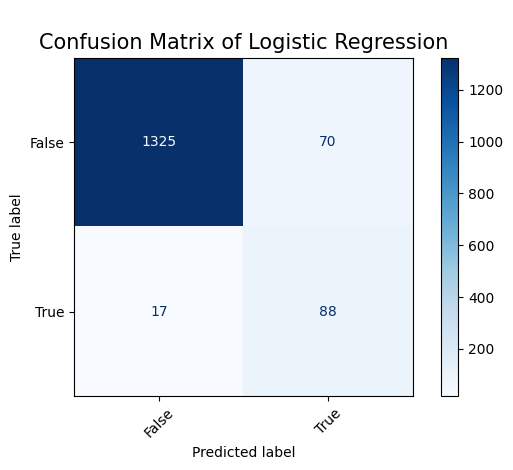

In [65]:
CLF =LogisticRegression()

param_grid1 = { 'solver':['lbfgs', 'liblinear','newton-cg','newton-cholesky','saga','sag'],
              'penalty':['l2'],'C': [1,0.1,00.1]}

cv1 = StratifiedKFold(n_splits=20, shuffle=False)

#scoring = make_scorer(['f1_micro'])StratifiedKFold

LR2 = GridSearchCV(estimator= CLF, cv=cv1, param_grid=param_grid1, n_jobs=-1, verbose=True, scoring='accuracy')

LR2.fit(X_train,y_train)
LR2_yPred = LR2.predict(X_test)


print('Accuracy of Logistic Regression with Hyper-Parameter:',accuracy_score(LR2_yPred, y_test))
print('\n Best Grid Score of Logistic Regression Model :', LR2.best_score_)
print('\nBest H-Paramter of Logistic regression model:\n', LR2.best_params_)
print('\n\tClasfcation Report of Logistic Regression Model \n', classification_report(LR2_yPred,y_test))
#print('\n Confusion Matrix of Logistic Regression:\n',confusion_matrix(LR2_yPred, y_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(LR2_yPred, y_test),
                                              display_labels= [False, True])
cm_display.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title('\nConfusion Matrix of Logistic Regression', size=15)
plt.tight_layout()
plt.show()

## DECISION TREE I

Accuracy Score : 0.98

Classification Report of Decision Tree :

               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1346
           1       0.89      0.92      0.90       154

    accuracy                           0.98      1500
   macro avg       0.94      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500


 Confusion Matrix of Decision Tree:
 [[1329   17]
 [  13  141]]


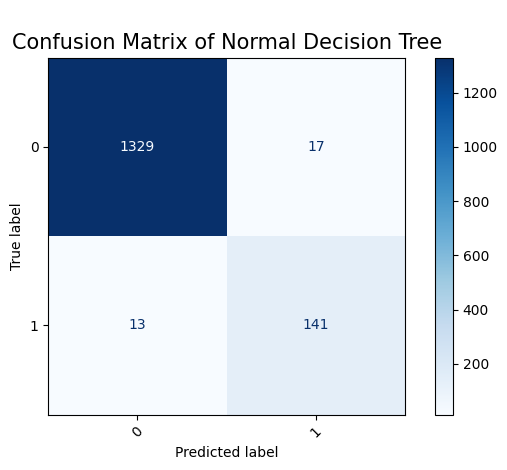

In [66]:
lrdt = DecisionTreeClassifier()
lrdt.fit(X_train,y_train)

y_pred3 = lrdt.predict(X_test)

print('Accuracy Score :',accuracy_score(y_pred3,y_test))
print('\nClassification Report of Decision Tree :\n\n',classification_report(y_pred3,y_test))
print('\n Confusion Matrix of Decision Tree:\n', confusion_matrix(y_pred3,y_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_pred3, y_test),
                                display_labels= lrdt.classes_)

cm_display.plot(cmap=plt.cm.Blues,xticks_rotation=45 )
plt.title('\nConfusion Matrix of Normal Decision Tree',size=15)
plt.tight_layout()
plt.show()

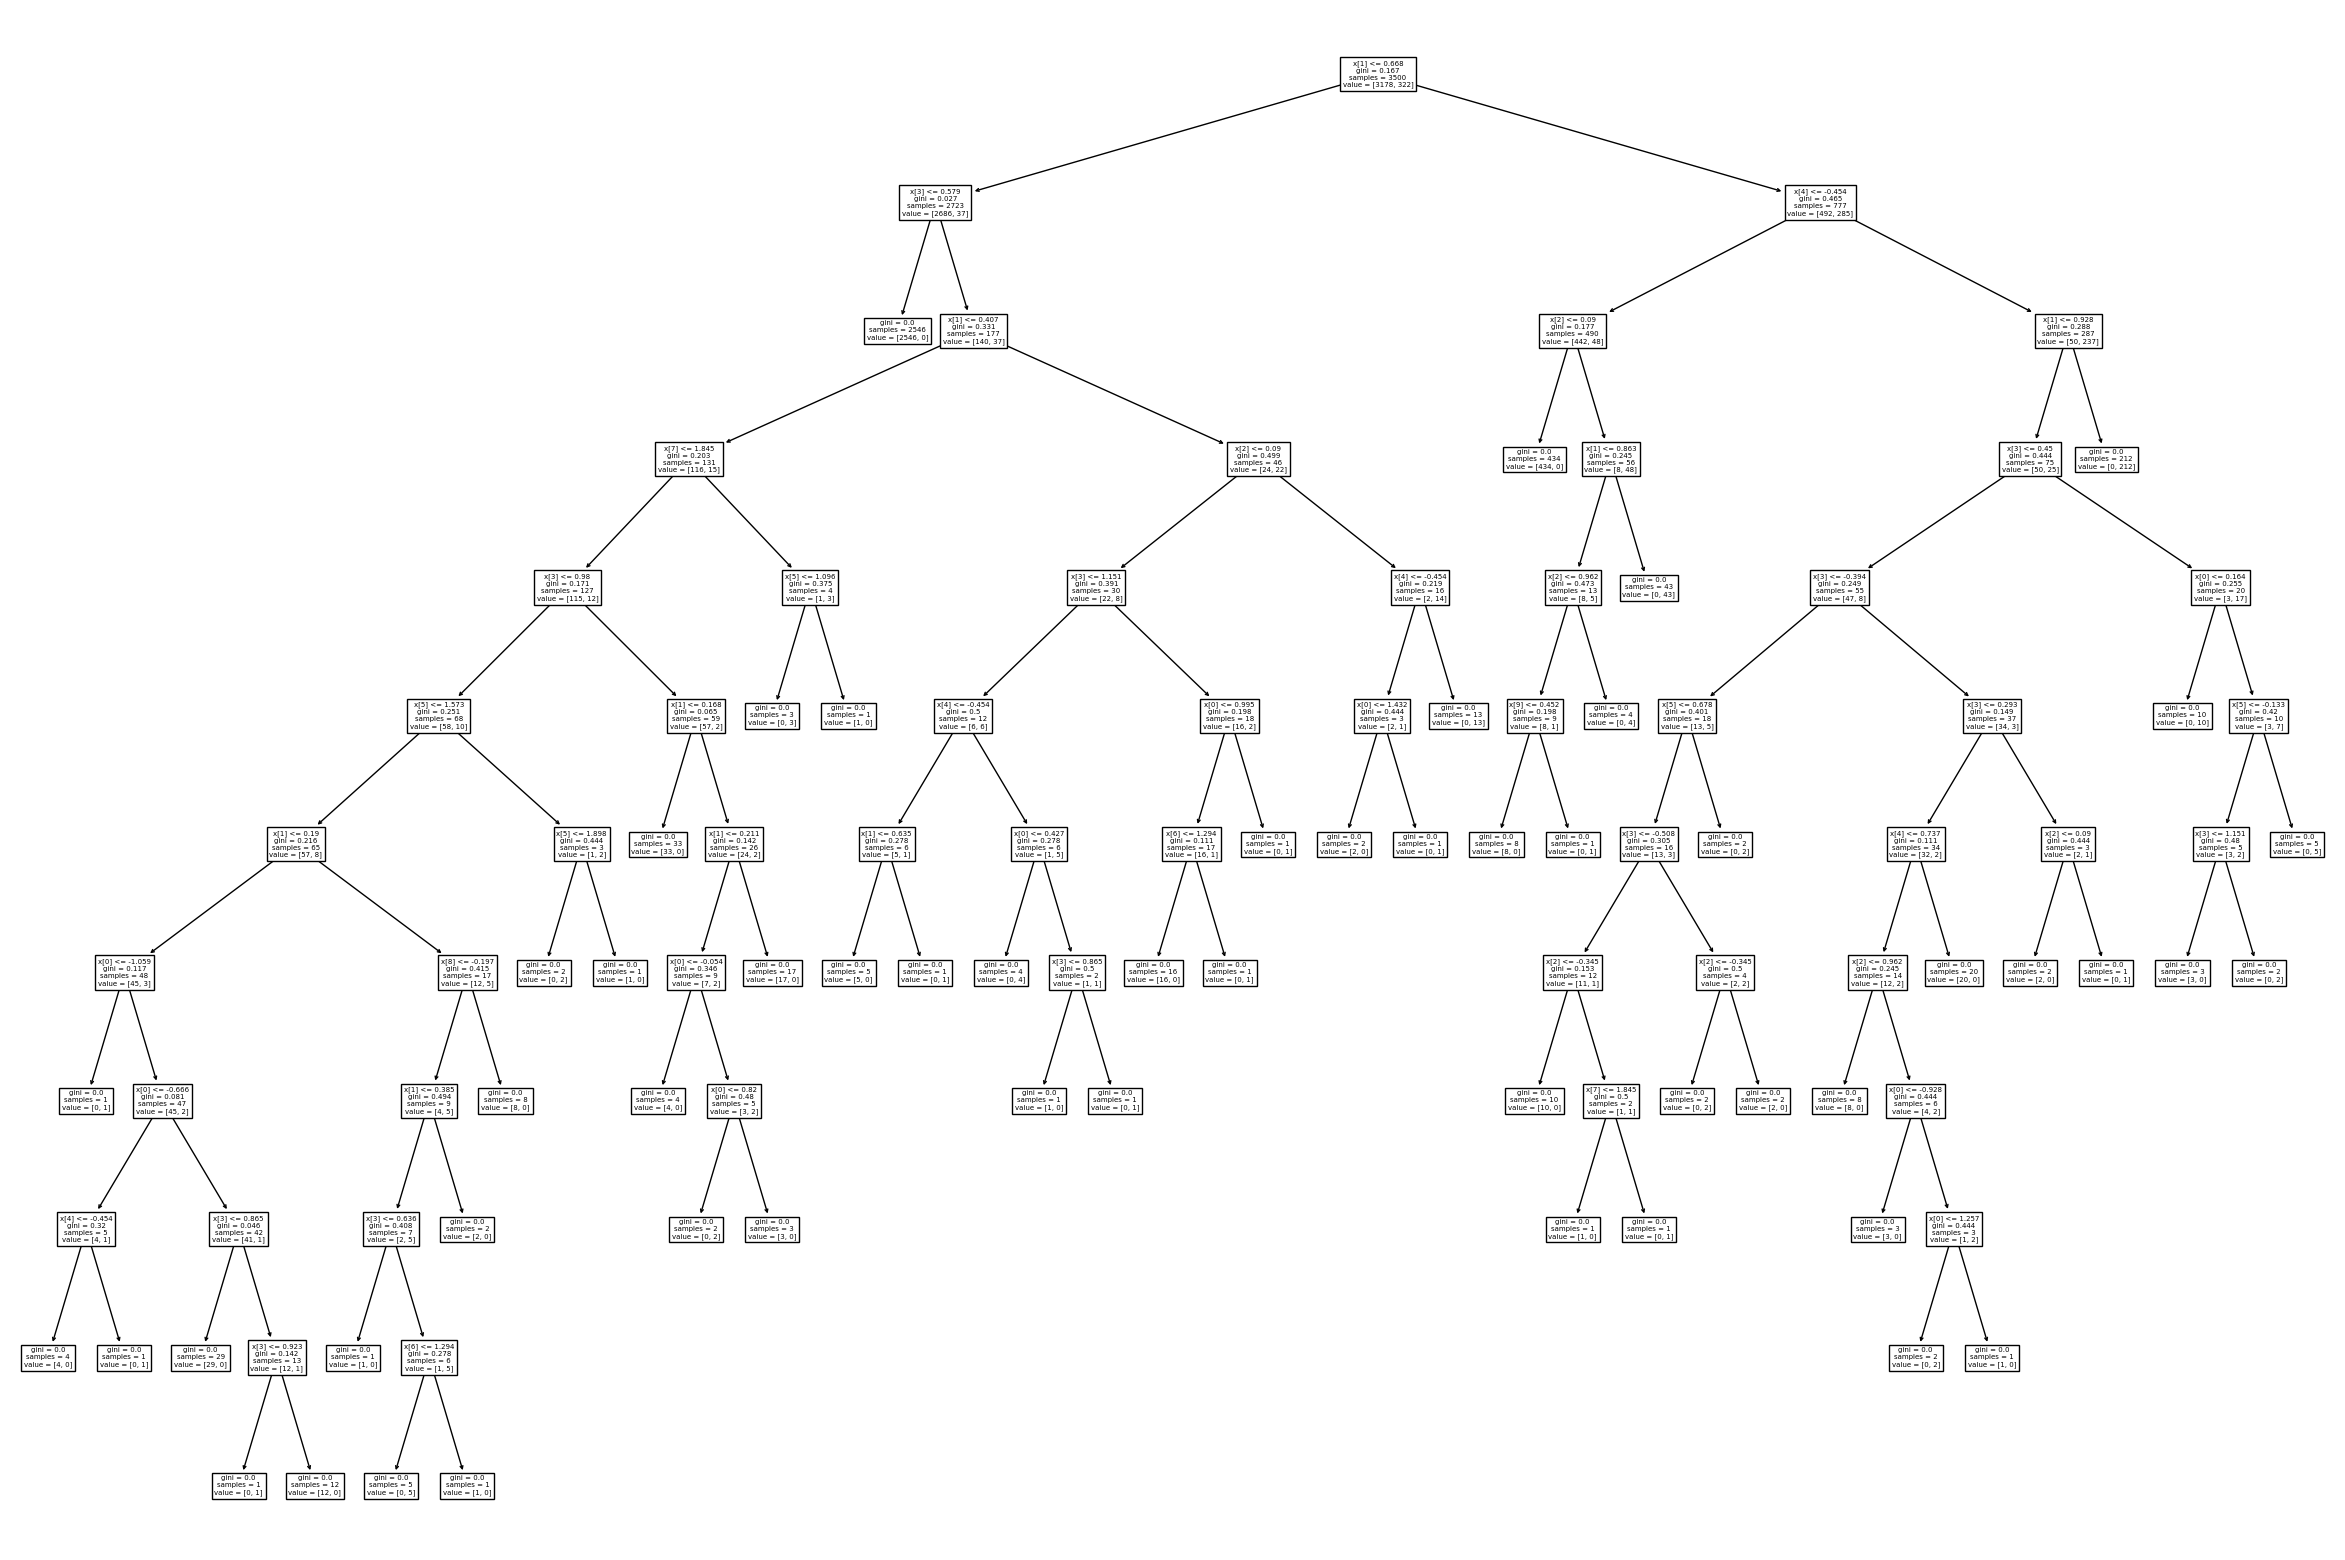

In [67]:
plt.figure(figsize=(30,20))
plot_tree(lrdt)
plt.show()

#AS we didn't give any max_depth so it will a tree at the max end and so it cause overfitting.

### DECISION-TREE-CLASSIFIER H-PARAMTERS

Fitting 15 folds for each of 216 candidates, totalling 3240 fits
Accuracy of Decision Tree Classifier 0.9793333333333333

Best Score of Decision Tree Classifier using GridSearchCV : 0.9877138280571756

Best paramater of Decision Tree Classifier Model: 
 {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 5, 'min_impurity_decrease': 0.01, 'splitter': 'best'}

	 Classiication Report of Decision Tree Classifier Model
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1357
           1       0.85      0.94      0.90       143

    accuracy                           0.98      1500
   macro avg       0.92      0.96      0.94      1500
weighted avg       0.98      0.98      0.98      1500



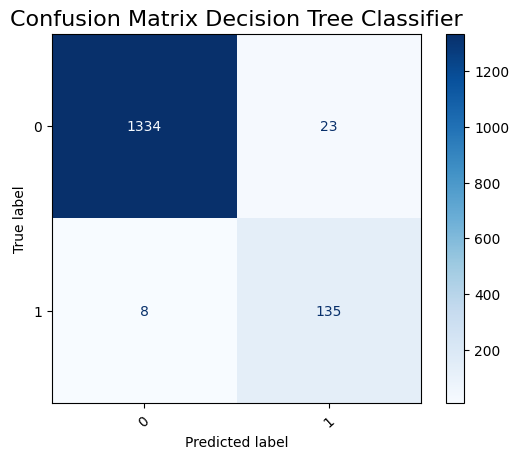

In [68]:
clf2 = DecisionTreeClassifier()

cv5 = StratifiedKFold(n_splits=15,shuffle=False)

param_grid5= {'splitter':['best','random'],
              'ccp_alpha':[0.1, .01, .001],
              'max_depth':[5,6,7,8,9,10],
              'criterion':['gini','entropy'],
              'min_impurity_decrease':[0.01,0.1,0.01]
}
#max_features':['auto','sqrt','log2']

LRDT2 = GridSearchCV(estimator =clf2, param_grid=param_grid5, cv= cv5, verbose=True,n_jobs=-1)
LRDT2.fit(X_train, y_train)

LRDT2_Pred = LRDT2.predict(X_test)

print('Accuracy of Decision Tree Classifier', accuracy_score(LRDT2_Pred, y_test))
print('\nBest Score of Decision Tree Classifier using GridSearchCV :', LRDT2.best_score_)
print('\nBest paramater of Decision Tree Classifier Model: \n', LRDT2.best_params_)

print('\n\t Classiication Report of Decision Tree Classifier Model\n',classification_report(LRDT2_Pred, y_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(LRDT2_Pred, y_test), 
                                           display_labels= LRDT2.classes_)
cm_display.plot(cmap= plt.cm.Blues, xticks_rotation= 42)
plt.title('Confusion Matrix Decision Tree Classifier',size =16)
plt.show()

# ENSEMBLE

### RANDOM FOREST CLASSIFIER

Fitting 10 folds for each of 96 candidates, totalling 960 fits
Accuracy Score of Random Forest Classifier 0.9846666666666667

Best of score of Random Forest Classifier using GridSearchCV 0.99

Best parameters of Random Forest Classifier using GridSearchCV {'bootstrap': False, 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}

	Classification Report of Random Forest Clasifier
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1355
           1       0.89      0.97      0.92       145

    accuracy                           0.98      1500
   macro avg       0.94      0.98      0.96      1500
weighted avg       0.99      0.98      0.98      1500



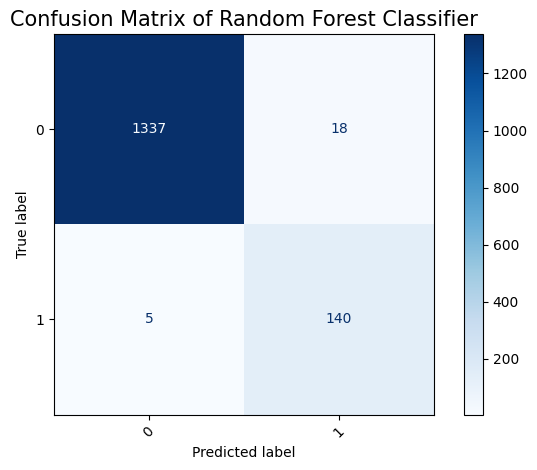

In [69]:
clf4 = RandomForestClassifier(n_jobs=-1)

param_grid = {'bootstrap': [True, False],
 'max_depth': [2, 8,10,14],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [800, 1000]}

cv = StratifiedKFold(n_splits=10, shuffle= False)

RF = GridSearchCV(estimator = clf4, param_grid=param_grid, cv= cv, n_jobs=-1,verbose=True )
RF.fit(X_train, y_train)
RF_yPred = RF.predict(X_test)

print('Accuracy Score of Random Forest Classifier', accuracy_score(RF_yPred, y_test))
print('\nBest of score of Random Forest Classifier using GridSearchCV', RF.best_score_)
print('\nBest parameters of Random Forest Classifier using GridSearchCV', RF.best_params_)
print('\n\tClassification Report of Random Forest Clasifier\n', classification_report(RF_yPred, y_test))
#print('\nCross validatio Score of Random Forest Clasifier', cross_val_score())

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(RF_yPred, y_test), 
                                           display_labels = RF.classes_)
cm_display.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title('Confusion Matrix of Random Forest Classifier',size=15 )
plt.tight_layout()
plt.show()

## VOTING CLASSIFIER

Accuracy of  Logistic Regression 0.99
Accuracy of  DecisionTree Classifier 0.99
Accuracy of  RandomForest Classifier 0.99

Accuracy of Voting Classifier Model 0.9833333333333333

	Classification metrics of Voting Classifier:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1357
           1       0.87      0.97      0.92       143

    accuracy                           0.98      1500
   macro avg       0.93      0.98      0.95      1500
weighted avg       0.98      0.98      0.98      1500


 1.0


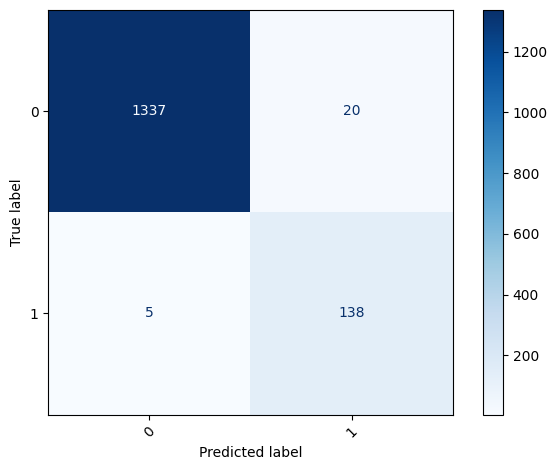

In [70]:
clf1 = LogisticRegression(C =10, penalty='l2',solver='lbfgs')
clf2 = DecisionTreeClassifier(ccp_alpha=0.0001,criterion='entropy',max_depth=15)
clf3 = RandomForestClassifier(bootstrap=False, max_depth=10,min_samples_leaf=1,min_samples_split = 5, n_estimators=800)


estimators = [('Logistic Regression',clf1),('DecisionTree Classifier',clf2),('RandomForest Classifier',clf3)]
cv7 = StratifiedKFold(n_splits=20,shuffle=False)

VC = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)

for estimators in estimators:
    x = cross_val_score(VC,X_scaled,y, cv=cv7, scoring='accuracy')
    print('Accuracy of ',estimators[0],np.round(np.mean(x),2))

VC.fit(X_train,y_train)

VC_yPred = VC.predict(X_test)

print('\nAccuracy of Voting Classifier Model', accuracy_score(VC_yPred, y_test))
print('\n\tClassification metrics of Voting Classifier:\n',classification_report(VC_yPred,y_test))

print('\n',np.round(np.mean(cross_val_score(VC,X_scaled,y, cv=cv7,scoring='accuracy'))))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(VC_yPred, y_test),
                                           display_labels = VC.classes_)
cm_display.plot(cmap = plt.cm.Blues, xticks_rotation=45)
plt.tight_layout()
plt.show()

# BAGGING CLASSIFIER

Accuracy Score of Bagging : 0.982

Cross Validated Accuracy of Bagging calssifier : 0.9863999999999999

Classification Report of Bagging Classifier: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1363
           1       0.85      0.98      0.91       137

    accuracy                           0.98      1500
   macro avg       0.92      0.98      0.95      1500
weighted avg       0.98      0.98      0.98      1500



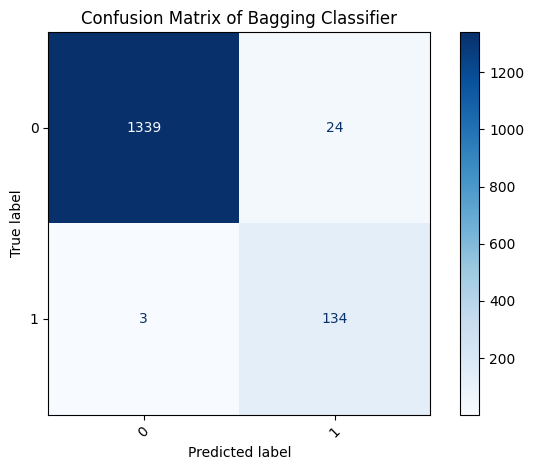

In [71]:
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                       n_estimators=2000,
                       max_features=0.7,
                       max_samples=0.80,
                       bootstrap=True,random_state=1000, n_jobs=-1)

bag = bag.fit(X_train,y_train)


bag_yPred= bag.predict(X_test)
print('Accuracy Score of Bagging :',accuracy_score(bag_yPred, y_test))
print("\nCross Validated Accuracy of Bagging calssifier :",np.mean(cross_val_score(bag, X_scaled,y,cv=10,scoring='accuracy')))
#print('Bagging Classifier confusion Martix :\n',confusion_matrix(bag_pred, y_test))
print("\nClassification Report of Bagging Classifier: \n",classification_report(bag_yPred, y_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(bag_yPred, y_test),
                                            display_labels = bag.classes_)
cm_display.plot(cmap = plt.cm.Blues, xticks_rotation=45)
plt.title('Confusion Matrix of Bagging Classifier')
plt.tight_layout()
plt.show()

In [72]:
#Basically we have reduced here false negative to 0 means that, Our model has predicted every person who want to take loan 
# and that's good for us because in the 

#False Negative:- Cx want to take the loan but model predicted it will not take loan, and we actualy reduced it to zero.
#                 So, here we don't want to miss a person.

#False Postive :- And although we are okay with False positive means, it's okay we classified them CX, that will want take 
# loan but at the end we know that not really want to take loan. But it's okay if we able to reduced it aas much we can.

## Finalzing Model

In [73]:
labels = ['Logistic Regression','Decision Tree', 
          'Decison Tree with Hyper-Parameter', 'Random Forest Classifier','Voting Classifier',
         'Bagging Classifier']

for clf, label in zip([LR2, lrdt,LRDT2 ,RF,VC,bag], labels):

    scores = cross_val_score(clf, X_scaled, y, 
                                              cv=3, 
                                              scoring='accuracy')
    print("\nAccuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

Fitting 20 folds for each of 18 candidates, totalling 360 fits
Fitting 20 folds for each of 18 candidates, totalling 360 fits
Fitting 20 folds for each of 18 candidates, totalling 360 fits

Accuracy: 0.95 (+/- 0.00) [Logistic Regression]

Accuracy: 0.98 (+/- 0.00) [Decision Tree]
Fitting 15 folds for each of 216 candidates, totalling 3240 fits
Fitting 15 folds for each of 216 candidates, totalling 3240 fits
Fitting 15 folds for each of 216 candidates, totalling 3240 fits

Accuracy: 0.98 (+/- 0.00) [Decison Tree with Hyper-Parameter]
Fitting 10 folds for each of 96 candidates, totalling 960 fits
Fitting 10 folds for each of 96 candidates, totalling 960 fits
Fitting 10 folds for each of 96 candidates, totalling 960 fits

Accuracy: 0.99 (+/- 0.00) [Random Forest Classifier]

Accuracy: 0.99 (+/- 0.00) [Voting Classifier]

Accuracy: 0.99 (+/- 0.00) [Bagging Classifier]


### ROC CURVE

In [74]:
#PREDICTING PROBALITIES

r_probs = [0 for _ in range (len(y_test))]
lr2_proba = LR2.predict_proba(X_test)
dt1_proba = lrdt.predict_proba(X_test)
dt2_proba = LRDT2.predict_proba(X_test)
rf_proba = RF.predict_proba(X_test)
vc_proba =  VC.predict_proba(X_test)
bag_proba = bag.predict(X_test)

lr2_proba = lr2_proba[:,1]
dt1_proba = dt1_proba[:,1]
dt2_proba = dt2_proba[:,1]
rf_proba = rf_proba[:,1]
vc_proba = vc_proba[:,1]
bag_proba = bag_proba



#Calculating the AUC-ROC graphs

lr2_auc = roc_auc_score(y_test, lr2_proba)
dt1_auc = roc_auc_score(y_test, dt1_proba)
dt2_auc = roc_auc_score(y_test, dt2_proba)
rf_auc = roc_auc_score(y_test, rf_proba)
bag_auc = roc_auc_score(y_test, bag_proba)
vc_auc = roc_auc_score(y_test, vc_proba)

print("Logistic regresison WH = AUC-ROC score = %0.3f"% lr2_auc)
print('Decision Tree Normal: AUC-ROC score = %0.3f'% dt1_auc)
print('Decision Tree with WH AUC-ROC score = %0.3f' %dt2_auc)
print('Random forest: AUC-ROC score\t = %0.3f'% rf_auc)
print('bagging Classifier: AUC-ROC score = %0.3f' %bag_auc)
print('Voting Classifier: AUC-ROC score = %0.3f' % vc_auc)


#Preidicting the test results

lr2_fpr, lr2_tpr, _ = roc_curve(y_test, lr2_proba)
dt1_fpr, dt1_tpr, _ = roc_curve(y_test, dt1_proba)
dt2_fpr, dt2_tpr, _ = roc_curve(y_test, dt2_proba)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba)
vc_fpr, vc_tpr, _ = roc_curve(y_test, vc_proba)
bg_fpr, bg_tpr, _ = roc_curve(y_test, bag_proba)

Logistic regresison WH = AUC-ROC score = 0.951
Decision Tree Normal: AUC-ROC score = 0.941
Decision Tree with WH AUC-ROC score = 0.992
Random forest: AUC-ROC score	 = 0.998
bagging Classifier: AUC-ROC score = 0.923
Voting Classifier: AUC-ROC score = 0.994


In [75]:
def plot_curve(tpr, fpr):
    plt.plot(lr2_fpr, lr2_tpr, marker='.',label='Logistic Regression (AUC-ROC =%0.3f)'% lr2_auc)
    plt.plot(dt1_fpr, dt1_tpr, marker='.',label='DecisionTree (AUC-ROC = %0.3f)'% dt1_auc)
    plt.plot(dt2_fpr, dt2_tpr, marker='.',label="DecisionTree WH (AUC-ROC = %0.3f)"% dt2_auc)
    plt.plot(rf_fpr,rf_tpr, marker='.',label ='Random Forest Clasifier (AUC-ROC = %0.3f)'% rf_auc)
    plt.plot(vc_fpr, vc_tpr, marker='.', label='Voting Classifier (AUC-ROC =  %0.3f)' % vc_auc)
    plt.plot(bg_fpr, bg_tpr, marker ='.',label= 'Bagging Classifier (AUC-ROC = %0.3f)' % bag_auc)
    plt.xlabel('False Postive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever Operating Characterstic (ROC) Curve')
    plt.legend()
    plt.tight_layout()
    plt.show()

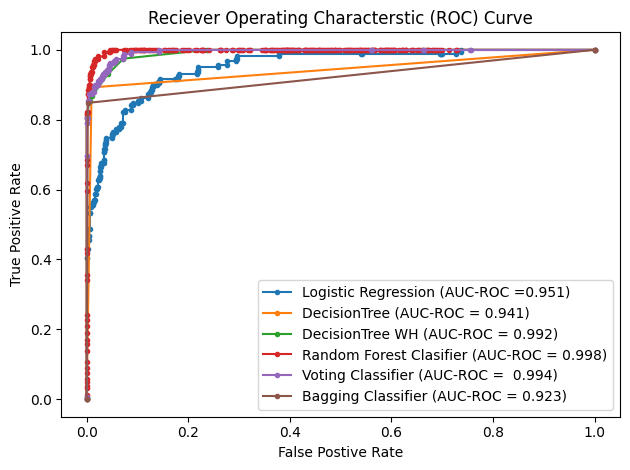

In [76]:
plot_curve(lr2_fpr, lr2_tpr)

## Conclusion

`Random forest Classifier is giving us a very good accuracy score which is 99% as well as with the good threshold score (ROC) is about 98%, and here our main aim to do-not miss a person who want/trying to take Personal loan.` 

`for Further reference we have to reduce the False Negative value as of now which is 5 and with the good threshold score (TPR), and as we saw by the help of AUC-ROC graph the random forest classifier has threshold around 0.9, above that threshold value person will have high chance likely to get a loan` 

`Note :- There is always be a trade off between False positive and False Negative, and we have to minimize the both`

`The best accuracy is coming from Random forest classifier with the high f1-score: 96% as well`